In [2]:
import math
import numpy as np
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'src'

In [3]:
def build_graph(root):
    g = graphviz.Digraph('Computational Graph', node_attr={'shape': 'record'})
    
    g.graph_attr['rankdir'] = 'LR'
    def recur(node):
        if not node:
            return
        parents = node._prev
        if not parents:
            return
        child_label = node.label
        child_op = node._op
        child_data = node.data
        child_grad = node.grad
        op_label = f'{child_op}_{child_label}'
        g.node(child_label, f'{child_label}| data {child_data:.4f} | grad {child_grad:.4f} ')
        g.node(op_label, f'{child_op}', shape='circle')
        g.edge(op_label, child_label)
        for p in parents:
            g.node(p.label, f'{p.label} | data {p.data:.4f} | grad {p.grad:.4f}')
            g.edge(p.label, op_label)
            recur(p)
    recur(root)
    return g

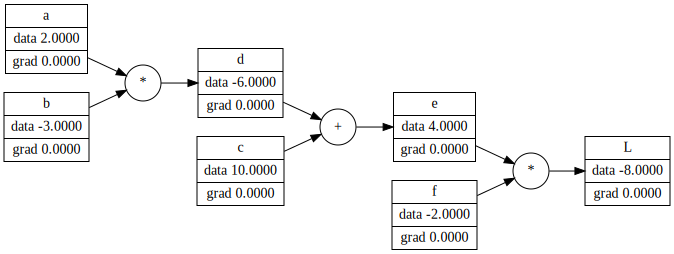

In [359]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd' 
e = d + c; e.label = 'e'
f = Value(-2.0, label='f')
L = e * f; L.label = 'L'
build_graph(L)

## Basic Neuron 

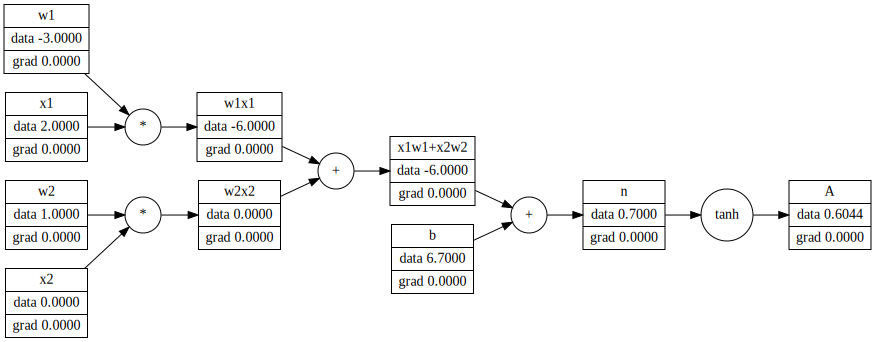

In [360]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')

w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'
x1w1x2w2 = w1x1 + w2x2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
A = n.tanh(); A.label = 'A'

build_graph(A)


## Manual Backprop Neuron

In [361]:
A.grad = 1.0
n.grad =  1.0 - A.data **2
x1w1x2w2.grad = n.grad
b.grad = n.grad
w1x1.grad = x1w1x2w2.grad
w2x2.grad = x1w1x2w2.grad
x2.grad = w2.data*w2x2.grad
w2.grad = x2.data*w2x2.grad
x1.grad = w1.data*w1x1.grad
w1.grad = x1.data*w1x1.grad

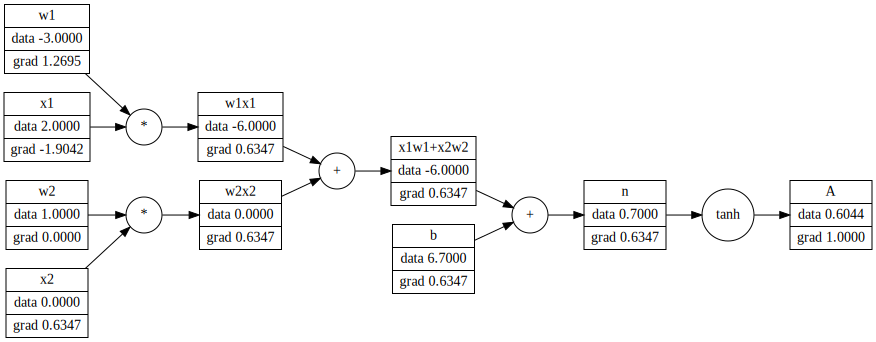

In [362]:
build_graph(A)

In [363]:
def gradient_check():
    h = Value(0.0001)
    w1x1 = w1*x1; w1x1.label = 'w1x1'
    w2x2 = w2*x2; w2x2.label = 'w2x2'
    x1w1x2w2 = w1x1 + w2x2; x1w1x2w2.label = 'x1w1+x2w2'
    n = x1w1x2w2 + b; n.label = 'n'
    # Nudge w1 by h
    w1h = w1 + h
    A1 = n.tanh(); A.label = 'A'
    w1x1 = w1h*x1; w1x1.label = 'w1x1'
    w2x2 = w2*x2; w2x2.label = 'w2x2'
    x1w1x2w2 = w1x1 + w2x2; x1w1x2w2.label = 'x1w1+x2w2'
    n = x1w1x2w2 + b; n.label = 'n'
    A2 = n.tanh(); A.label = 'A'

    return (A2.data-A1.data)/h.data

In [364]:
gradient_check() # The output will be the gradient of A with respect to w

1.2693257351281684

# Reverse Mode Autodifferentiation

In [365]:
A.clear() # Reset the gradients to 0

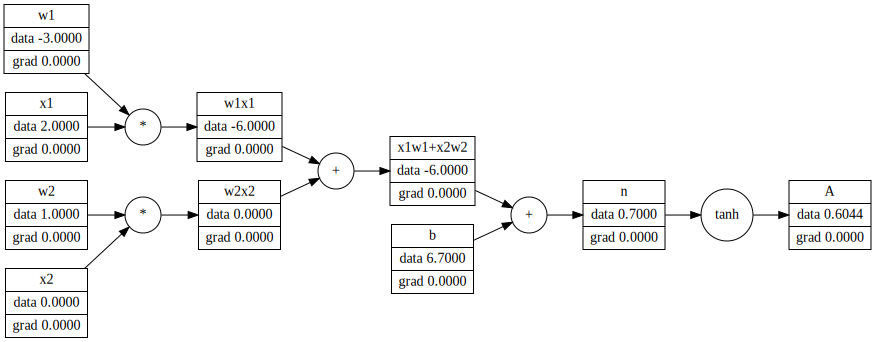

In [366]:
build_graph(A)

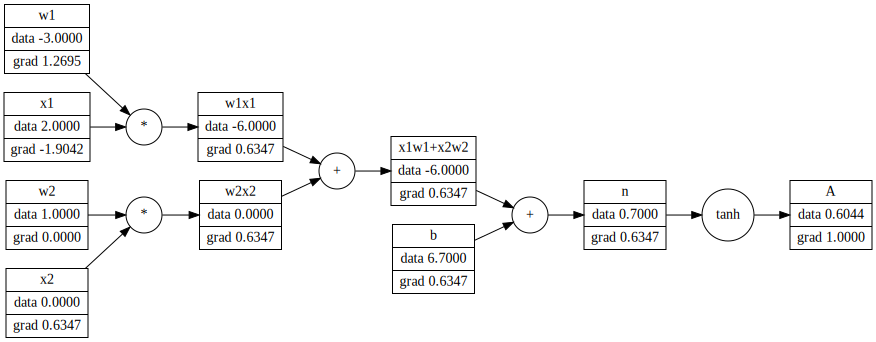

In [367]:
A.backward()
build_graph(A)